In [2]:
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
import itertools
import time
from matplotlib.ticker import FuncFormatter
import seaborn as sns # Ida: Jeg har lige tilføjet denne linje :) 

# Setting seaborn aesthetics
sns.set_style({'patch.force_edgecolor': False})
sns.set_palette('Blues_r',)

In [3]:
## FROM EXAM-SHEET
# a. parameters
N = 50000
mu = np.array([3,2,1])
Sigma = np.array([[0.25, 0, 0], [0, 0.25, 0], [0, 0, 0.25]])
gamma = 1
zeta = 1

# b. random draws
seed = 1986
np.random.seed(seed)

# preferences
alphas = np.exp(np.random.multivariate_normal(mu, Sigma, size=N))
betas = alphas/np.reshape(np.sum(alphas,axis=1),(N,1))

# endowments
e1 = np.random.exponential(zeta,size=N)
e2 = np.random.exponential(zeta,size=N)
e3 = np.random.exponential(zeta,size=N)

### Question 1
We plot budget-shares by plotting $\beta$'s, since we have that demand for consumer $j$ is given by:
$$
x^{*j}_1 = \beta^j_i \frac{I_j}{p_i}
$$
and budget-share thereby is given by:
$$
\frac{p_i*x^{*j}_1}{I_j} = \frac{p_i \cdot \beta^j_i \frac{I_j}{p_i}}{I_j} = \beta^j_i
$$

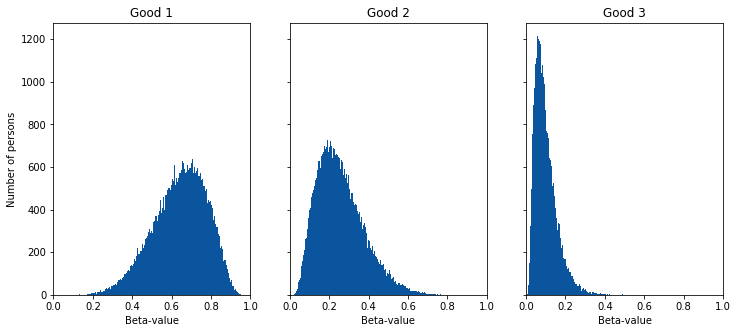

In [4]:
# Plotting budget shares

# Substracting beta-1's, beta-2's, and beta-3's
beta_1s = betas[:,0]
beta_2s = betas[:,1]
beta_3s = betas[:,2]

# Initiating subplot
fig1, (ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3,sharey=True,figsize=(12,5))

# Plotting histogram of each beta-value, setting titles, labels, and limits for each plot
ax1.hist(beta_1s, bins=200)
ax1.set_title('Good 1')
ax1.set_xlabel('Beta-value')
ax1.set_ylabel('Number of persons')
ax1.set_xlim(0,1)

ax2.hist(beta_2s, bins=200)
ax2.set_title('Good 2')
ax2.set_xlabel('Beta-value')
ax2.set_xlim(0,1)

ax3.hist(beta_3s, bins=200)
ax3.set_title('Good 3')
ax3.set_xlabel('Beta-value')
ax3.set_xlim(0,1);


### Question 2

In [108]:
# Defining functions calculating demand of each good
def demand_good1(p1,p2,e1,e2,e3,betas):
    """
    Calculating demand for good 1
    
    Args:
        p1 (type: float): Price for good 1
        p2 (type: float): Price for good 2
        e1 (type: numpy array): Endowments of good 1
        e2 (type: numpy array): Endowments of good 2
        e3 (type: numpy array): Endowments of good 3
        betas (type: numpy ndarray): Preferences for goods
        
    Returns:
        (type: float): Demand for good 1
    """
    I = e1*p1+e2*p2+e3
    return betas[:,0]*I/p1

def demand_good2(p1,p2,e1,e2,e3,betas):
    """
    Calculating demand for good 2
    
    Args:
        p1 (type: float): Price for good 1
        p2 (type: float): Price for good 2
        e1 (type: numpy array): Endowments of good 1
        e2 (type: numpy array): Endowments of good 2
        e3 (type: numpy array): Endowments of good 3
        betas (type: numpy ndarray): Preferences for goods
        
    Returns:
        (type: float): Demand for good 2
    """
    I = e1*p1+e2*p2+e3
    return betas[:,1]*I/p2

def demand_good3(p1,p2,e1,e2,e3,betas):
    """
    Calculating demand for good 3
    
    Args:
        p1 (type: float): Price for good 1
        p2 (type: float): Price for good 2
        e1 (type: numpy array): Endowments of good 1
        e2 (type: numpy array): Endowments of good 2
        e3 (type: numpy array): Endowments of good 3
        betas (type: numpy ndarray): Preferences for goods
        
    Returns:
        (type: float): Demand for good 3
    """
    I = e1*p1+e2*p2+e3
    return betas[:,2]*I

In [109]:
def excess_good1(p1,p2,e1,e2,e3,betas):
    """
    Calculating excess demand of good 1
    
    Args:
        p1 (type: float): Price for good 1
        p2 (type: float): Price for good 2
        e1 (type: numpy array): Endowments of good 1
        e2 (type: numpy array): Endowments of good 2
        e3 (type: numpy array): Endowments of good 3
        betas (type: numpy ndarray): Preferences for goods
        
    Returns:
        excess (type: float): Excess demand of good 1
    """
    # Summing array of demand
    demand = np.sum(demand_good1(p1,p2,e1,e2,e3,betas))
    # Summing array of enowments
    supply = np.sum(e1)
    # Calculating excess demand
    excess = demand-supply
    return excess

def excess_good2(p1,p2,e1,e2,e3,betas):
    """
    Calculating excess demand of good 2
    
    Args:
        p1 (type: float): Price for good 1
        p2 (type: float): Price for good 2
        e1 (type: numpy array): Endowments of good 1
        e2 (type: numpy array): Endowments of good 2
        e3 (type: numpy array): Endowments of good 3
        betas (type: numpy ndarray): Preferences for goods
        
    Returns:
        excess (type: float): Excess demand of good 2
    """
    # Summing array of demand
    demand = np.sum(demand_good2(p1,p2,e1,e2,e3,betas))
    # Summing array of endowments
    supply = np.sum(e2)
    # Calculating excess demand
    excess = demand-supply
    return excess

def excess_good3(p1,p2,e1,e2,e3,betas):
    """
    Calculating excess demand of good 3
    
    Args:
        p1 (type: float): Price for good 1
        p2 (type: float): Price for good 2
        e1 (type: numpy array): Endowments of good 1
        e2 (type: numpy array): Endowments of good 2
        e3 (type: numpy array): Endowments of good 3
        betas (type: numpy ndarray): Preferences for goods
        
    Returns:
        excess (type: float): Excess demand of good 3
    """
    # Summing array of demand
    demand = np.sum(demand_good3(p1,p2,e1,e2,e3,betas))
    # Summing array of endowments
    supply = np.sum(e3)
    # Calculating excess demand
    excess = demand-supply
    return excess

# Choosing number of price-values to plot function for
size = 100

# Generating arrays of prices
p1_s = np.linspace(0.5,10,size)
p2_s = np.linspace(0.5,10,size)

# Initiating empty grids for excess demands
excess_1_grid = np.empty((size,size))
excess_2_grid = np.empty((size,size))

# Transforming price-vectors to grids
p1_grid, p2_grid = np.meshgrid(p1_s, p2_s) 

# Calculating excess-demands for each price-combination
for i,p1 in enumerate(p1_s):
    for j,p2 in enumerate(p2_s):
        excess_1_grid[i,j] = excess_good1(p1,p2,e1,e2,e3,betas)
        excess_2_grid[i,j] = excess_good2(p1,p2,e1,e2,e3,betas)

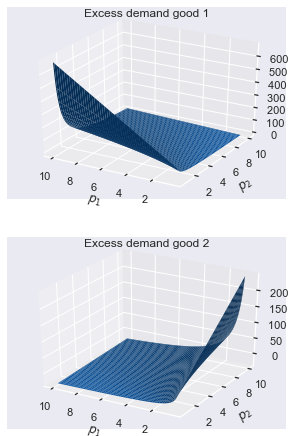

Note: z-axis displayed in thousands


In [294]:
# Function to convert z-ticks to thousands
def thousands(x, pos):
    return ' %1.0f' % (x*1e-3)

# Calling formatter
formatter = FuncFormatter(thousands)

# Initiating figure
fig = plt.figure(figsize=(5,12))

# Creating 3-d-subplots and setting properties
ax1 = fig.add_subplot(311, projection='3d')
fig1 = ax1.plot_surface(p1_grid,p2_grid,excess_1_grid)
ax1.invert_xaxis()
ax1.set_title('Excess demand good 1')
ax1.set_xlabel('$p_1$')
ax1.set_ylabel('$p_2$')

# Formatting z-ticks to thousands
ax1.zaxis.set_major_formatter(formatter)


ax2 = fig.add_subplot(312, projection='3d')
ax2.plot_surface(p1_grid,p2_grid,excess_2_grid)
ax2.invert_xaxis()
ax2.set_title('Excess demand good 2')
ax2.set_xlabel('$p_1$')
ax2.set_ylabel('$p_2$')

# Formatting z-ticks to thousands
ax2.zaxis.set_major_formatter(formatter)

plt.show()

print('Note: z-axis displayed in thousands')

### Question 3

In [308]:
def tatonnement(p1,p2,e1,e2,e3,betas,tol=0.1**7,kappa=0.1,prints=True):
    """
    Finds Walras-euilibrium prices through tâtonnement process, and printing (if chosen) iteration process
    
    Args:
        p1 (type: float): Starting guess on price for good 1
        p2 (type: float): Starting guess on price for good 2
        e1 (type: numpy array): Endowments of good 1
        e2 (type: numpy array): Endowments of good 2
        e3 (type: numpy array): Endowments of good 3
        betas (type: numpy ndarray): Preferences for goods
        tol (type: float): Tolerance level for excess demands. Operates as substitute for zero
        kappa (type: float): Conversion aggresivity
        prints (type: boolean): Boolean deciding whether to print iteration process or not
        
    Returns:
        p1_star (type: float (or None if no convergence)): Equilibrium price for good 1
        p2_star (type: float (or None if no convergence)): Equilibrium price for good 2
    """
    
    # Calculating initial excess demands
    ex_1 = excess_good1(p1,p2,e1,e2,e3,betas)
    ex_2 = excess_good2(p1,p2,e1,e2,e3,betas)
    
    # Print starting values
    if prints:
        print(f'Start:{" ":6s} excess good 1 = {ex_1:10.4f}, excess good 2 = {ex_2:10.4f} with p1 = {p1:10.6f}, p2 = {p2:10.6f} \n')
    
    # Setting iteration counter
    t = 1
    
    # Looping for a maximum of 100000 iterations
    while t < 100000:
        
        # Calculating initial excess demands
        ex_1 = excess_good1(p1,p2,e1,e2,e3,betas)
        ex_2 = excess_good2(p1,p2,e1,e2,e3,betas)

        # Checking whether excess demands has converged to below tolerance level
        if abs(ex_1)<tol and abs(ex_2)<tol:
            # Printing (if chosen) and setting equilibrium prices, an returning function (so it stops)
            if prints:
                print(f'\nPrices in Walras equilibrium are: p1 = {p1:.6f} and p2 = {p2:.6f}')
            p1_star = p1
            p2_star = p2
            return p1_star, p2_star

        # If excess demands have not converged, prices are adjusted by average excess demand multiplied by kappa
        else:
            p1 += kappa*ex_1/N
            p2 += kappa*ex_2/N

        # Print iteration process    
        if prints:
            if t <= 5:
                print(f'Iter {t:6.0f}: excess good 1 = {ex_1:10.4f}, excess good 2 = {ex_2:10.4f} ---> p1 = {p1:10.6f}, p2 = {p2:10.6f}')
                time.sleep(.5)

            if t == 5:
                print('\n...\n')

            if t%1000 == 0:
                print(f'Iter {t:6.0f}: excess good 1 = {ex_1:10.4f}, excess good 2 = {ex_2:10.4f} ---> p1 = {p1:10.6f}, p2 = {p2:10.6f}')

        # Updating iteration counter
        t += 1
        
    # Print statement if maximum numbers of iterations is exceeded
    if t == 100000: 
        text = 'Excess demands did not converge \n'
        text += f'Excess good 1 = {ex_1:10.4f} and excess good 2 = {ex_2:10.4f}'
        text += f'Prices at p1 = {p1:10.6f} and p2 = {p2:10.6f}'
        print(text)
        return None, None

In [310]:
# Finding Walras-equilibrium prices

# Initial guess on prices
p1 = 10
p2 = 2

# Calling function to find equilibrium prices
p1_star, p2_star = tatonnement(p1,p2,e1,e2,e3,betas)

Start:       excess good 1 = -8229.9057, excess good 2 = 33953.2761 with p1 =  10.000000, p2 =   2.000000 

Iter      1: excess good 1 = -8229.9057, excess good 2 = 33953.2761 ---> p1 =   9.983540, p2 =   2.067907
Iter      2: excess good 1 = -7996.8734, excess good 2 = 31524.8187 ---> p1 =   9.967546, p2 =   2.130956
Iter      3: excess good 1 = -7779.1018, excess good 2 = 29404.3235 ---> p1 =   9.951988, p2 =   2.189765
Iter      4: excess good 1 = -7574.6873, excess good 2 = 27532.7659 ---> p1 =   9.936839, p2 =   2.244830
Iter      5: excess good 1 = -7382.0917, excess good 2 = 25865.8947 ---> p1 =   9.922075, p2 =   2.296562

...

Iter   1000: excess good 1 =  -577.5643, excess good 2 =  -215.2719 ---> p1 =   7.189169, p2 =   2.877381
Iter   2000: excess good 1 =  -110.2233, excess good 2 =   -41.1123 ---> p1 =   6.612840, p2 =   2.662496
Iter   3000: excess good 1 =   -18.2890, excess good 2 =    -6.8226 ---> p1 =   6.510114, p2 =   2.624177
Iter   4000: excess good 1 =    -2.956

### Question 4

In [153]:
def utility(p1, p2, e1, e2, e3, betas, gamma):
    """
    Calculating utility
    
    Args:
        p1 (type: float): Starting guess on price for good 1
        p2 (type: float): Starting guess on price for good 2
        e1 (type: numpy array): Endowments of good 1
        e2 (type: numpy array): Endowments of good 2
        e3 (type: numpy array): Endowments of good 3
        betas (type: numpy ndarray): Preferences for goods
        gamma (type: float): Utility scalar
    
    Returns:
        util (type: numpy array): Vector of utility-values 
    """
    # Calculating income
    I = p1*e1+p2*e2+e3
    
    # Calculating demands based on given prices, preferences and income
    x_1 = betas[:,0]*(I/p1)
    x_2 = betas[:,1]*(I/p2)
    x_3 = betas[:,2]*I
    
    # Calculating utility
    util = (x_1**betas[:,0]+x_2**betas[:,1]+x_3**betas[:,2])**gamma
    return util

The distribution of the utilities has a mean of 2.376 and a variance of 0.512


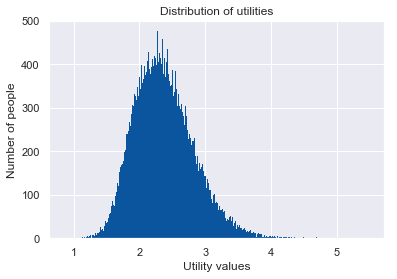

In [320]:
# Calling function to find vector of utilities
u_vec = utility(p1_star, p2_star, e1, e2, e3, betas, gamma)

# Plotting distribution of utilities, and printing mean and variance
plt.hist(u_vec, bins=500)
plt.title('Distribution of utilities')
plt.xlabel('Utility values')
plt.ylabel('Number of people')
mean = np.mean(u_vec)
var = np.var(u_vec)
print(f'The distribution of the utilities has a mean of {mean:.3f} and a variance of {variance:.3f}')

### Question 5

In [315]:
# Set new set of endowments, equal to mean of each initial endowment
e1_new = np.zeros(N)+np.mean(e1)
e2_new = np.zeros(N)+np.mean(e2)
e3_new = np.zeros(N)+np.mean(e3)

p1 = 10
p2 = 2

p1_star_new, p2_star_new = tatonnement(p1,p2,e1_new,e2_new,e3_new,betas)

Start:       excess good 1 = -8246.4733, excess good 2 = 34022.6195 with p1 =  10.000000, p2 =   2.000000 

Iter      1: excess good 1 = -8246.4733, excess good 2 = 34022.6195 ---> p1 =   9.983507, p2 =   2.068045
Iter      2: excess good 1 = -8012.9554, excess good 2 = 31586.7949 ---> p1 =   9.967481, p2 =   2.131219
Iter      3: excess good 1 = -7794.7436, excess good 2 = 29460.2821 ---> p1 =   9.951892, p2 =   2.190139
Iter      4: excess good 1 = -7589.9263, excess good 2 = 27583.7185 ---> p1 =   9.936712, p2 =   2.245307
Iter      5: excess good 1 = -7396.9587, excess good 2 = 25912.6183 ---> p1 =   9.921918, p2 =   2.297132

...

Iter   1000: excess good 1 =  -577.8899, excess good 2 =  -215.6924 ---> p1 =   7.184463, p2 =   2.878055
Iter   2000: excess good 1 =  -109.9982, excess good 2 =   -41.0852 ---> p1 =   6.608340, p2 =   2.662948
Iter   3000: excess good 1 =   -18.2017, excess good 2 =    -6.7995 ---> p1 =   6.505925, p2 =   2.624692
Iter   4000: excess good 1 =    -2.934

In [322]:
def _disfig(gamma):
    """
    Function to be called in interactive figure
    
    Args:
        gamma (type: float): Utility scalar, which is defined by widgets.interact
        
    Returns:
        None
        
    Note:
        Uses values for equilibrium prices, endowments, and preferences, which are all defined earlier in the code.
        Plots two figures and prints text containing mean and variance.
    """
    # Calculate utility-vectors
    u_vec_new = utility(p1_star_new, p2_star_new, e1_new, e2_new, e3_new, betas, gamma)
    u_vec = utility(p1_star, p2_star, e1, e2, e3, betas, gamma)

    # Calculate means and variances
    mean_new = np.mean(u_vec_new)
    var_new = np.var(u_vec_new)
    mean = np.mean(u_vec)
    var = np.var(u_vec)

    # Initiate subplot-figure
    fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,sharey=True,figsize=(12,5))

    # Plot utility distributions and set figure-properties
    ax1.hist(u_vec_new, bins=500)
    ax1.set_title('Distribution of utilites with \nequally distributed endowments')
    ax1.set_xlabel('Utility-value')
    ax1.set_ylabel('Number of people')

    ax2.hist(u_vec, bins=500)
    ax2.set_title('Distribution of utilities with \nexponential distributed endowments')
    ax2.set_xlabel('Utility-value')

    # Print text containing means and variances
    ax1_text = f'Mean = {mean_new:.3f}, Variance = {var_new:.3f}'
    ax2_text = f'Mean = {mean:.3f}, Variance = {var:.3f}'
    
    text = f'{" ":13s}'
    text += f'Mean = {mean_new:.3f}, variance = {var_new:.3f}'
    text += f'{" ":21s}'
    text += f'Mean = {mean:.3f}, variance = {var:.3f}'
    
    
    plt.show()
    print(text)
    
# Calling interactive function
widgets.interact(_disfig,
                gamma = widgets.RadioButtons(
                description = '$\\gamma$',
                options=[.5,.8,1.0,1.5,2.0]));

interactive(children=(RadioButtons(description='$\\gamma$', options=(0.5, 0.8, 1.0, 1.5, 2.0), value=0.5), Out…